In [1]:
import os
import torch
from datasets import load_dataset
from huggingface_hub import snapshot_download
from cosmos_tokenizer.image_lib import ImageTokenizer
from torchvision.transforms.v2 import ToPILImage, PILToTensor, CenterCrop
from piq import SSIMLoss

In [2]:
device="cuda:3"
model_name = "Cosmos-Tokenizer-DI16x16"
hf_repo = "nvidia/" + model_name
local_dir = "pretrained_ckpts/" + model_name
os.makedirs(local_dir, exist_ok=True)
print(f"downloading {model_name} to {local_dir}...")
snapshot_download(repo_id=hf_repo, local_dir=local_dir)
encoder = ImageTokenizer(checkpoint_enc=f'pretrained_ckpts/{model_name}/encoder.jit').to(device)
decoder = ImageTokenizer(checkpoint_dec=f'pretrained_ckpts/{model_name}/decoder.jit').to(device)

downloading Cosmos-Tokenizer-DI16x16 to pretrained_ckpts/Cosmos-Tokenizer-DI16x16...


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
ds = load_dataset("danjacobellis/LSDIR_val",split='validation')

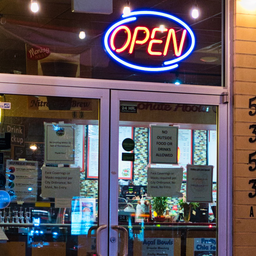

In [4]:
x = PILToTensor()(CenterCrop(256)(ds[28]['image'])).unsqueeze(0)
x = x.to(device).to(torch.bfloat16)/255 - 0.5
ToPILImage()(x[0].to(torch.float)+0.5)

In [5]:
(indices,codes) = encoder.encode(x)
y = decoder.decode(indices)
y = y.to(torch.float).clamp(-0.5,0.5)

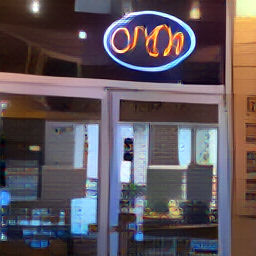

In [6]:
ToPILImage()(y[0]+0.5)

In [7]:
SSIMLoss()(x.to(torch.float)+0.5,y+0.5)

tensor(0.5121, device='cuda:3')

In [8]:
indices.max()

tensor(62949, device='cuda:3', dtype=torch.int32)

In [9]:
2**16

65536

In [10]:
3*256*256*8/(16*16*16)

384.0